# Análise de treinamentos

### Carrega os dados de treinamento

Available tags: ['train/loss', 'train/grad_norm', 'train/learning_rate', 'train/epoch', 'eval/loss', 'eval/runtime', 'eval/samples_per_second', 'eval/steps_per_second', 'train/train_runtime', 'train/train_samples_per_second', 'train/train_steps_per_second', 'train/total_flos', 'train/train_loss']


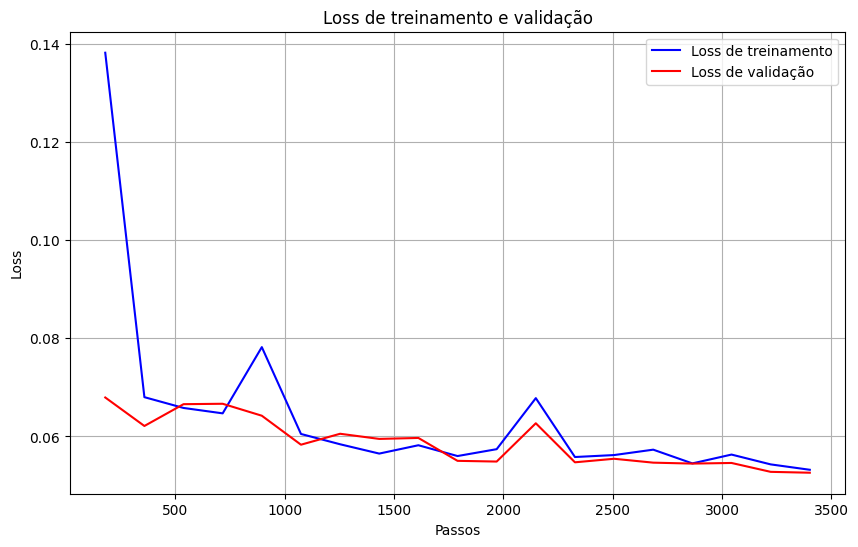


Training Loss Statistics:
count    19.000000
mean      0.064068
std       0.019026
min       0.053200
25%       0.056100
50%       0.057400
75%       0.065250
max       0.138200
dtype: float64

Validation Loss Statistics:
count    19.000000
mean      0.058809
std       0.005008
min       0.052600
25%       0.054688
50%       0.058311
75%       0.062403
max       0.067933
dtype: float64


In [25]:
from tensorboard.backend.event_processing import event_accumulator
import pandas as pd
import matplotlib.pyplot as plt


def plot_losses(path='./outputs/runs/events.out.tfevents.1733605596.31d91be9abb2.30642.0'):
    events = event_accumulator.EventAccumulator(path)
    events.Reload()

    print(f'Available tags: {events.Tags()["scalars"]}')

    train_loss = []
    train_steps = []
    eval_loss = []
    eval_steps = []

    for e in events.Scalars('train/loss'):
        train_steps.append(e.step)
        train_loss.append(e.value)

    if 'eval/loss' in events.Tags()['scalars']:
        for e in events.Scalars('eval/loss'):
            eval_steps.append(e.step)
            eval_loss.append(e.value)

    plt.figure(figsize=(10, 6))
    plt.plot(train_steps, train_loss, label='Loss de treinamento', color='blue')
    if eval_loss:
        plt.plot(eval_steps, eval_loss, label='Loss de validação', color='red')

    plt.title('Loss de treinamento e validação')
    plt.xlabel('Passos')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.legend()
    plt.savefig('../plots/loss.png', dpi=300, bbox_inches='tight')
    plt.show()

    print('\nTraining Loss Statistics:')
    print(pd.Series(train_loss).describe())
    if eval_loss:
        print('\nValidation Loss Statistics:')
        print(pd.Series(eval_loss).describe())


plot_losses()